### Example 5 - Bland-Altman plots

### 2.1 What to do?
Next we will create Bland-Altman plots exemplary data from the TotalSegmentator training dataset comparing volume measurements by two readers for some structures. Therefore load the exemplary data (ex5.csv). Now the goal is to create Bland-Altman plots.

The function statsmed.bland_altman_plot(), allows you to make these plots in a fast way. It requires as input the data (x and y, that you want to compare) (please exclude NaN or None values), the figure, the title, label of x-axis, label of y-axis.

If applied to your own data please be careful with possible NaN or None values in your data.

The exemplary data contains: two measurements of volume from reader 1 (R1) and reader 2 (R2) from the left and right kidney, iliopsoas and from the aorta. Whereas Volumes are given in $mm^3$.

Again, we want to exclude the data where the volume is zero, using 10 ml as a lower cut-off and we want to report the volume in ml, so we need to divide the current value by 1000 .

So let us compare the volumes from R1 with R2 of the right kidney.

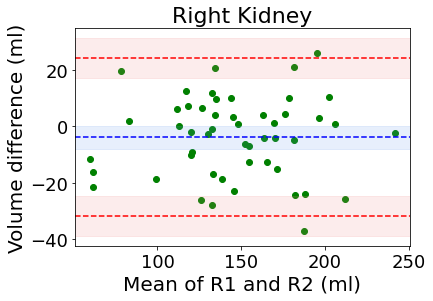

In [1]:
import pandas
import numpy as np
from statsmed import statsmed
import matplotlib.pyplot as plt
data = pandas.read_csv('ex5.csv',delimiter=',',on_bad_lines='skip')

new_data = data[['kidney_right_volume_R1','kidney_right_volume_R2']][(data['kidney_right_volume_R1'] > 10) & (data['kidney_right_volume_R2'] > 10)]/1000
new_data = new_data[:50] #only look at the first 50 volumes (just for example so that the confidence intervals get larger)

statsmed.bland_altman_plot(new_data['kidney_right_volume_R1'],new_data['kidney_right_volume_R2'],plt.gca(),'Right Kidney','Mean of R1 and R2 (ml)','Volume difference (ml)')


So we created a Bland–Altman plot for the right kidney comparing R1 and R2, with the mean of the R1 and R2 on the x-axis and the value difference between R1 and R2 on the y-axis. The dashed blue line represents the bias between the two scanners with the upper and lower dashed red lines representing the upper and lower limits of agreement calculated through mean $\pm$ 1.96 SD. The light blue background represents the standard error of the bias and the light red backgrounds the standard error of the limits of agreement.

Let us make more plots...

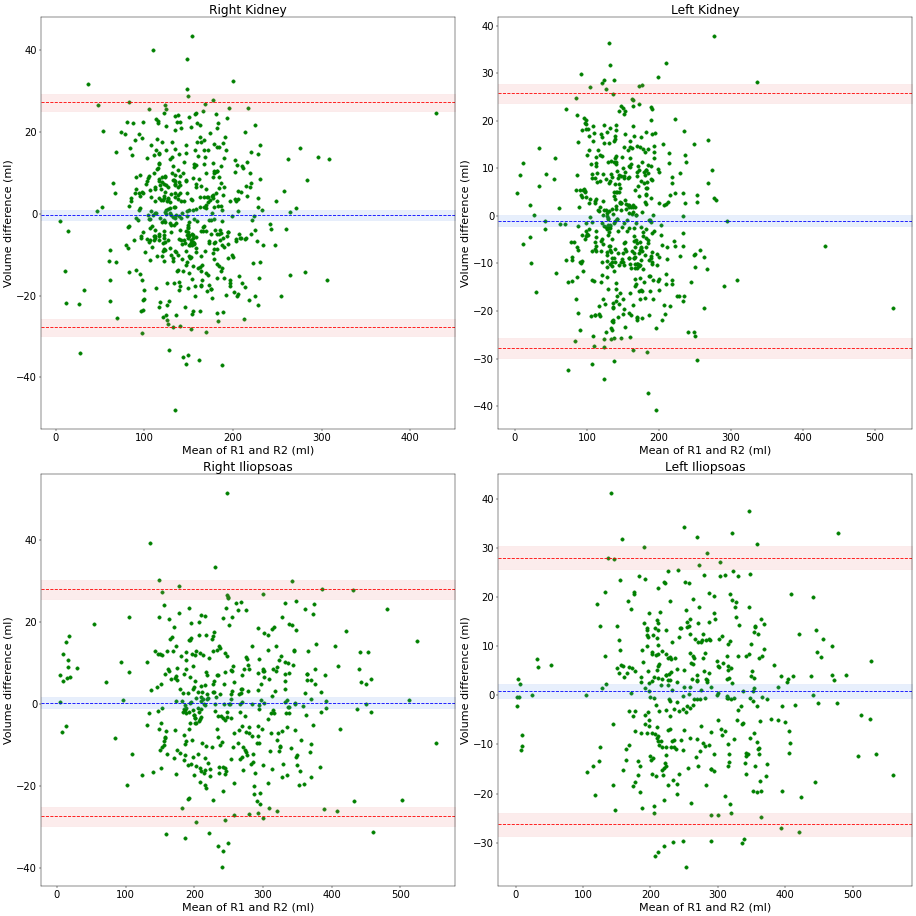

In [2]:
import pandas
import numpy as np
from statsmed import statsmed
import matplotlib.pyplot as plt
data = pandas.read_csv('ex5.csv',delimiter=',',on_bad_lines='skip')

new_data_right_kidney = data[['kidney_right_volume_R1','kidney_right_volume_R2']][(data['kidney_right_volume_R1'] > 10) & (data['kidney_right_volume_R2'] > 10)]/1000
new_data_left_kidney = data[['kidney_left_volume_R1','kidney_left_volume_R2']][(data['kidney_left_volume_R1'] > 10) & (data['kidney_left_volume_R2'] > 10)]/1000
new_data_right_iliopsoas = data[['iliopsoas_right_volume_R1','iliopsoas_right_volume_R2']][(data['iliopsoas_right_volume_R1'] > 10) & (data['iliopsoas_right_volume_R2'] > 10)]/1000
new_data_left_iliopsoas = data[['iliopsoas_left_volume_R1','iliopsoas_left_volume_R2']][(data['iliopsoas_left_volume_R1'] > 10) & (data['iliopsoas_left_volume_R2'] > 10)]/1000

fig=plt.figure(figsize=(23, 23),dpi=40)
x1=fig.add_subplot(2,2,1)
statsmed.bland_altman_plot(new_data_right_kidney['kidney_right_volume_R1'],new_data_right_kidney['kidney_right_volume_R2'],x1,'Right Kidney','Mean of R1 and R2 (ml)','Volume difference (ml)')
x2=fig.add_subplot(2,2,2)
statsmed.bland_altman_plot(new_data_left_kidney['kidney_left_volume_R1'],new_data_left_kidney['kidney_left_volume_R2'],x2,'Left Kidney','Mean of R1 and R2 (ml)','Volume difference (ml)')
x3=fig.add_subplot(2,2,3)
statsmed.bland_altman_plot(new_data_right_iliopsoas['iliopsoas_right_volume_R1'],new_data_right_iliopsoas['iliopsoas_right_volume_R2'],x3,'Right Iliopsoas','Mean of R1 and R2 (ml)','Volume difference (ml)')
x4=fig.add_subplot(2,2,4)
statsmed.bland_altman_plot(new_data_left_iliopsoas['iliopsoas_left_volume_R1'],new_data_left_iliopsoas['iliopsoas_left_volume_R2'],x4,'Left Iliopsoas','Mean of R1 and R2 (ml)','Volume difference (ml)')
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig('Bland_Altman_subplots.png',transparent=False) # saves the figure

### 2.2 What to write?

In the statistical analysis section of a manuscript you may write:

"For each reader, we compared the volumes of the anatomic structures using Bland–Altman analysis."

In the figure legends, where you used Bland-Altman plots, you may write:

"Bland–Altman plots for volumes of anatomical structures, with the mean of R1 and R2 on the x-axis and the value difference between R1 and R2 on the y-axis. The dashed blue line represents the bias between the two scanners with the upper and lower dashed red lines representing the upper and lower limits of agreement calculated through mean $\pm$ 1.96 SD. The light blue background represents the standard error of the bias and the light red backgrounds the standard error of the limits of agreement."
